# A Tale of Two Investor Types:
## How the Interaction of Forward-looking and Backward-looking Investors Explains the Non-Random Walk of Asset Markets
### Forward-looking = **Long Term Investors**
### Backward-looking = **Extrapolators**


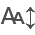

ThemeRegistry.enable('carbong100')

In [1]:
%load_ext autoreload
%autoreload 2

import polars as pl
import altair as alt
from bubbles.agents import *
from bubbles.timeseries import *
from bubbles.investors import *
from bubbles.market import *
from bubbles.dz import dz
from itables import (init_notebook_mode, show)

init_notebook_mode(all_interactive=True)
alt.theme.enable('carbong100')

## Model Parameters

In [2]:
mp = Market(seed=131) #1337194922

extrapolator = Extrapolator.new()
long_term_investor = LongTermInvestor.new()
rebalancer = Rebalancer_60_40.new()
investors = [extrapolator, long_term_investor, rebalancer]

print(mp)
print(extrapolator)
print(long_term_investor)
print(rebalancer)

Market Parameters
-----------------
  years: 50
  initial expected_return: 4.00%
  earnings vol: 10.00%
  payout ratio: 50.00%
  history length: 5
  seed: 131

Extrapolator
-----------
Parameters:
  speed_of_adjustment: 0.100
  squeeze_target: 4.00%
  max_deviation: 4.00%
  squeezing: 0.100
  weights: [0.328, 0.246, 0.184, 0.138, 0.104]

  Investor Parameters
  -----------------
    percent: 33.33%
    gamma: 3.00
    sigma: 16.00%


LongTermInvestor
---------------
  Investor Parameters
  -----------------
    percent: 33.33%
    gamma: 3.00
    sigma: 16.00%


Rebalancer_60_40
---------------
  Investor Parameters
  -----------------
    percent: 33.33%
    gamma: 3.00
    sigma: 16.00%




In [3]:
df = data_table(mp, investors)
df = df.select([
    pl.col('^.*$').cast(pl.Float64).round(6)
])
show(df[:], maxBytes=0)
# show(df[655:], maxBytes=0)
    

### Percent of ending wealth held by long term inverstors

In [4]:
wealth_y = df.get_column("Wealth y")[-1]
wealth_x = df.get_column("Wealth x")[-1]
wealth_y / (wealth_y +  wealth_x)

0.6418591374209344

In [5]:
chart_data = df.select([
    'Month',
    pl.col('Price Idx').alias('Price Index'),
    pl.col('Fair Value')
]).unpivot(
    index=['Month'],
    on=['Price Index', 'Fair Value'],
    variable_name='Metric',
    value_name='Value'
)

alt.Chart(chart_data).mark_line().encode(
    x='Month',
    y='Value',
    color=alt.Color('Metric:N', scale=alt.Scale(
        domain=['Price Index', 'Fair Value'],
    ))
).properties(
    width=700,
    height=500,
    title="Stock Market Price Index vs. Fair Value"
)

alt.Chart(...)

In [6]:
(df.plot.line(x='Month', y='Premium')
   .encode(
       color=alt.datum('Premium')  # This creates a legend entry for Premium
   )
   .properties(width=700, height=500, title="Premium / Discount")
)

alt.Chart(...)